<a href="https://colab.research.google.com/github/romanzes637/simple-hex-som/blob/master/simple_som_hex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Super Simple Self-Organizing Map (SOM, Kohonen Map)

By https://algobeans.com/2017/11/02/self-organizing-map/ 

Step 0: Randomly position the grid’s neurons in the data space.

Step 1: Select one data point, either randomly or systematically cycling through the dataset in order

Step 2: Find the neuron that is closest to the chosen data point. This neuron is called the Best Matching Unit (BMU).

Step 3: Move the BMU closer to that data point. The distance moved by the BMU is determined by a learning rate, which decreases after each iteration.

Step 4: Move the BMU’s neighbors closer to that data point as well, with farther away neighbors moving less. Neighbors are identified using a radius around the BMU, and the value for this radius decreases after each iteration.

Step 5: Update the learning rate and BMU radius, before repeating Steps 1 to 4. Iterate these steps until positions of neurons have been stabilized.

Local coordinates (X, Y) - coordinates of the rusult Image and Neurons on it (Neuron is an image pixel)

Global coordinates (R, G, B) - coordinates of Samples and Neurons at Sample space


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Samples global (RGB) coordinates
n_samples = 2
samples_gcs = [[1, 0, 0], [0, 1, 0]]  # red and green
print(samples_gcs)

[[1, 0, 0], [0, 1, 0]]


In [0]:
# Neurons local coordinates
size = 13
n_neurons = size ** 2
# Neurons local (Image) coordinates
neurons_lcs = [[x, y] for x in range(size) for y in range(size)]
print(neurons_lcs)
# Neurons global coordinates
neuron_size = 3 # At RGB (Sample) space
neurons_gcs = np.random.rand(n_neurons, neuron_size)
hexagon = True  # Crop image by Hexagon 
if hexagon:
  # If Neuron not in Hexagon set Neuron global coordinates
  # very far from Samples, to place that other neurons can't reach
  def in_hexagon(lcs, d, x, y):
    lcs[0] -= x
    lcs[1] -= y
    px, py = map(abs, lcs)
    return px < 3**0.5 * min(d / 2 - py, d / 4)
  # Filter (mask) Neurons if the are not in the Hexagon
  # TODO better solution: Mask Neurons and remove them from algorithm
  # after unmask them
  far_place = np.array([-2., -2., -2.])
  neurons_gcs = [x if in_hexagon(neurons_lcs[i], size, size / 2, size/ 2)
                 else far_place for i, x in enumerate(neurons_gcs)]
print(neurons_gcs)

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [6, 0], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8], [6, 9], [6, 10], [6, 11], [6, 12], [7, 0], [7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7], [7, 8], [7, 9], [7, 10], [7, 11], [7, 12], [8, 0], [8, 1], [8, 2], [8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [8, 8], [8, 9], [8, 10], [8, 11], [8, 12], [9, 0], [9, 1], [9, 2], [9, 3], [9, 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


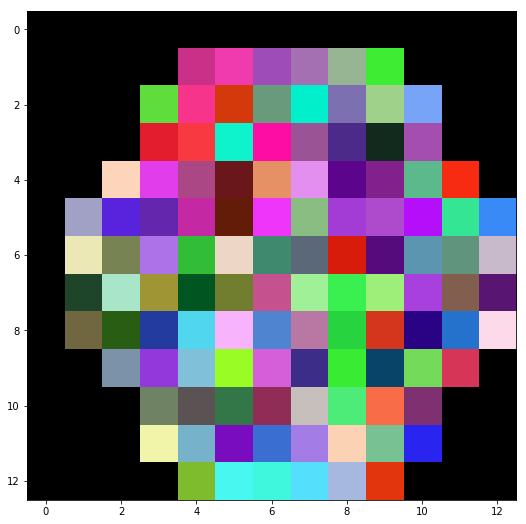

In [0]:
# Neurons before training
# test_image = [
#     [[1., 0., 0.], [1., 0., 0.]],
#     [[0., 0., 1.], [0., 0., 1.]]
# ]
image = np.reshape(neurons_gcs, (size, size, neuron_size))
plt.figure(figsize=(9, 9))
plt.imshow(image)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


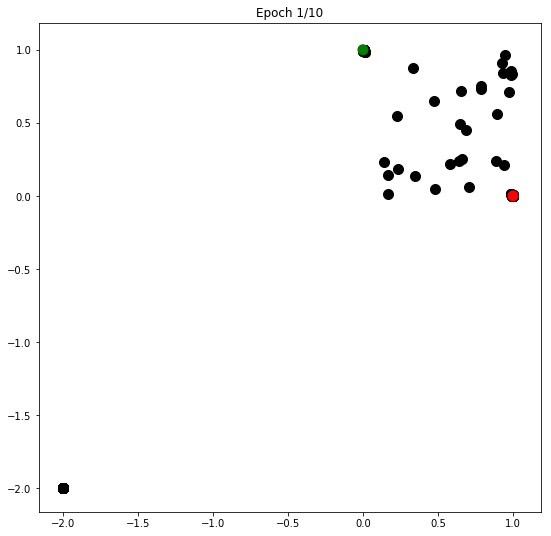

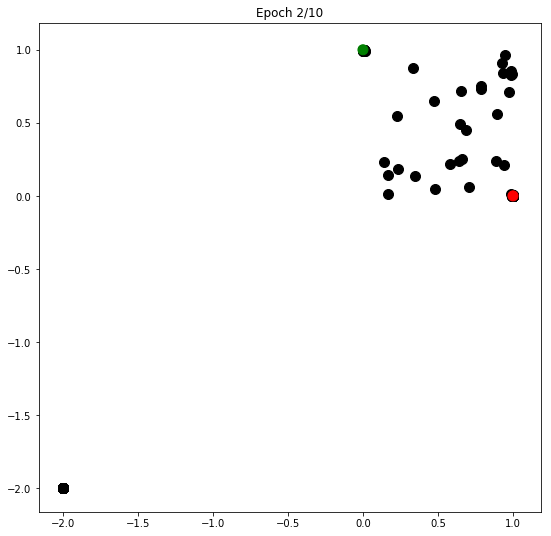

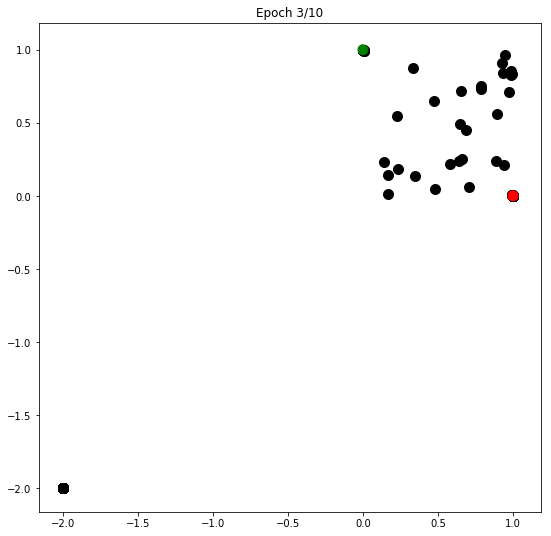

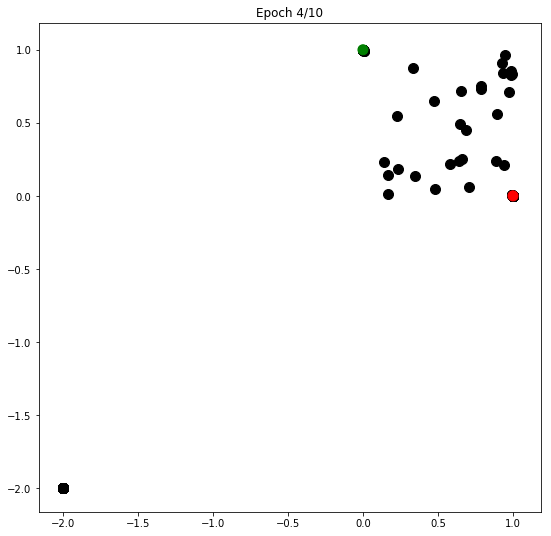

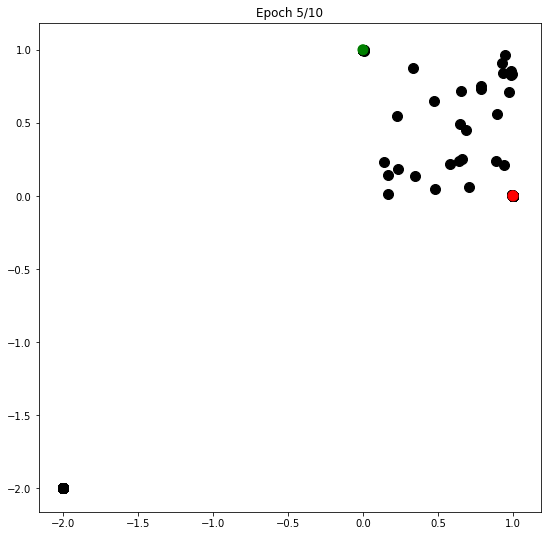

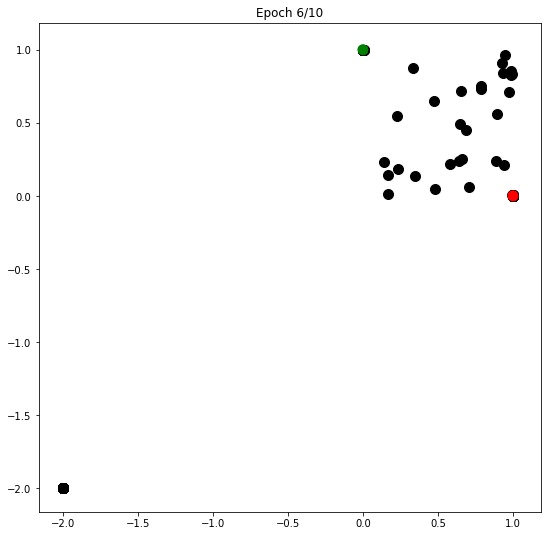

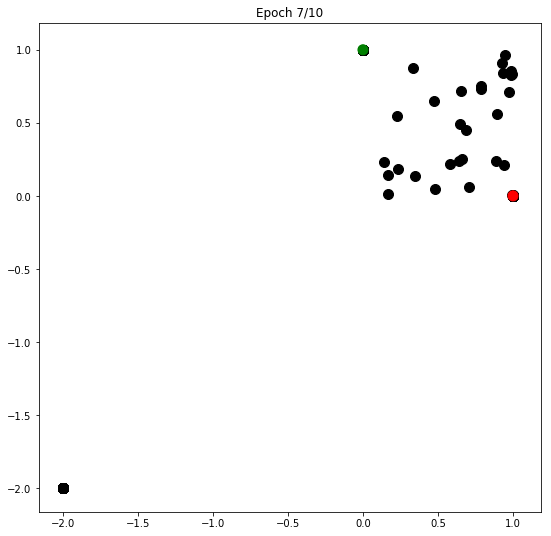

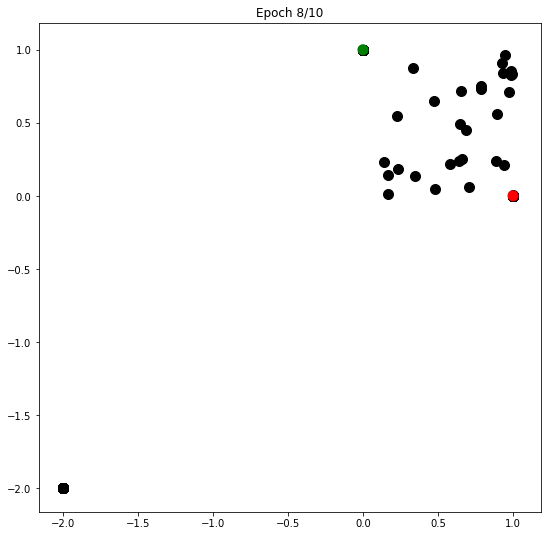

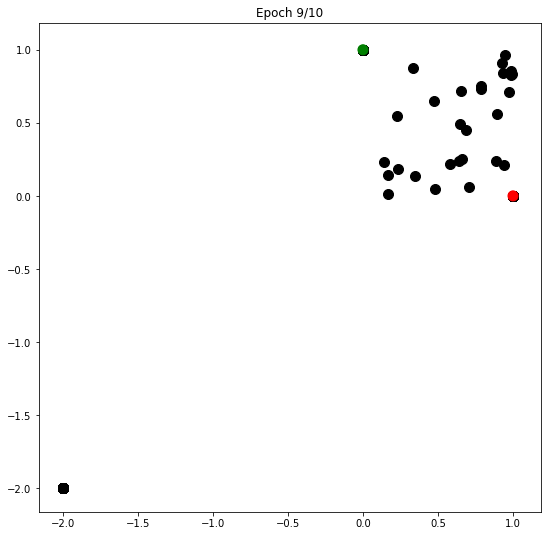

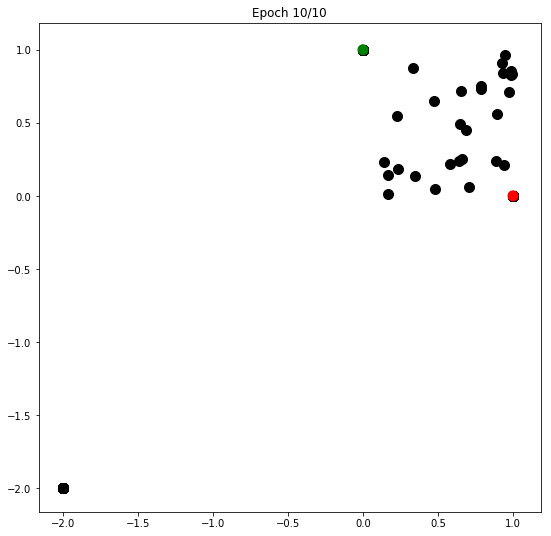

In [0]:

# Simple Self-Organizing Map (SOM) algorithm
n_epochs = 10
spd = 0.3  # Neurons speed
spd_step = -0.01 # Speed chage step per epoch
rad = 0.87  # Neurons radius
rad_step = -0.01  # Radius chage step per epoch
for i in range(n_epochs):
  print('Epoch {}/{}'.format(i + 1, n_epochs))
  for s in samples_gcs:  # For each Sample coordinates
      # Find BMU - Best Matching Unit (Neuron) for the current Sample
      vs = list()  # Neuron to Sample vectors
      for n in neurons_gcs:  # For each Neuron coordinates
        v = s - n
        vs.append(v)
      ds = [np.linalg.norm(x) for x in vs]  # Neuron - Sample distances
      bmu = np.argmin(ds)  # Neuron closest to the Sample 
      # Moving Neuron to the Sample
      spd += spd_step  # Neuron to Sample speed
      v = vs[bmu] # Neuron to Sample vector
      mv = v * spd  # Move vector
      neurons_gcs[bmu] += mv  # Moving
      # Moving BMU Neuron Neighbours to the Sample
      rad += rad_step  # Max radius for Neuron Neigbours
      nds = list()  # BMU - other Neurons distances
      cs = neurons_gcs[bmu]  # BMU Neuron coordinates
      for n in neurons_gcs:
        d = np.linalg.norm(cs - n)
        nds.append(d)
      for j, d in enumerate(nds):
        if d <= rad and i != bmu:  # if distance <= radius and not BMU itself
          v = vs[j] # Neuron to Sample vector
          mv = v * spd  # Move vector
          neurons_gcs[j] += mv  # Moving
  # Plot Epoch in 2D (R, G) but really it is in 3D (R, G, B)
  plt.figure(figsize=(9, 9))
  plt.title('Epoch {}/{}'.format(i + 1, n_epochs))
  plt.scatter(*zip(*[x[:2] for x in neurons_gcs]), s=100, c='black')
  plt.scatter(*zip(*[x[:2] for x in samples_gcs]), s=100, c=['red', 'green'])
  # for i, n in enumerate(neurons_gcs):
  #   plt.annotate('N{}'.format(i), n[:2], fontsize=10)
#   for i, s in enumerate(samples_gcs):
#     plt.annotate('{}'.format(['red', 'green']), s[:2], color=[[1, 0, 0], [0, 1, 0]],
#                  fontsize=15, xytext=(6, 6), 
#                  textcoords="offset points", ha='left', va='center')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


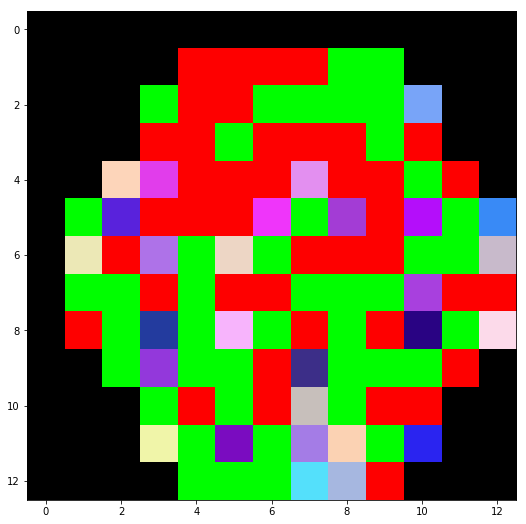

In [0]:
# Neurons after training
image = np.reshape(neurons_gcs, (size, size, neuron_size))
plt.figure(figsize=(9, 9))
plt.imshow(image)